# CASO REAL DE NEGOCIO:

## 1 -  Descripción del caso de negocio

La empresa para la que trabajas te ha facilitado un dataset con datos de clientes. Te piden que hagas un análisis de los datos para poder responder a las siguientes preguntas relacionadas con el valor de vida del cliente: ***(CLV - Customer Lifetime Value)***
- ¿Cuál es el valor de vida del cliente?
- ¿Cuál es el valor de vida del cliente por canal de adquisición?
- ¿Cuál es el valor de vida del cliente por producto?
- ¿Cuál es el valor de vida del cliente por mes de adquisición?
- ¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?

Por otro lado quieren poder visualizar los datos de forma que se puedan ver las siguientes relaciones:
- Valor de vida del cliente vs edad
- Valor de vida del cliente vs edad y sexo
- Valor de vida del cliente vs edad y producto
- Valor de vida del cliente vs edad y canal de adquisición
- Valor de vida del cliente vs edad, sexo y producto
- Valor de vida del cliente vs edad, sexo y canal de adquisición

Además de ello, quieren que analices las campañas de marketing que han realizado contestando a las siguientes preguntas:
- ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

Una vez hayas realizado el añalisis, tendrás que presentar tus respuestas a las preguntas que te han realizado apoyándote en los gráficos que hayas realizado para ello, además de cualquier otro insight que hayas encontrado en el análisis y consideres relevante para el negocio.

## 2 - Descripcion de los datos:  

+ **customer :** `ID del cliente`                        
+ **state :** `estados en US`                      
+ **customer_lifetime_value :** `CLV es el valor economico del cliente para la empresa durante toda su relacion`
+ **response :**  `Respuesta a campañas/llamadas (marketing-engagement)`                   
+ **coverage :** `Tipo de cobertura del cliente`                        
+ **education** `Nivel educativo del cliente`                   
+ **effective_to_date :** `Fecha efectiva`              
+ **employmentstatus :** `Estado laboral del cliente`                
+ **gender :**  `Genero del cliente`                  
+ **income :**  `Ingresos del cliente`
+ **location_code :** `Zona de residencia del cliente`                  
+ **marital_status :** `Estado Civil del cliente`                  
+ **monthly_premium_auto :** `Premium mensual`            
+ **months_since_last_claim :** `Ultima reclamacion del cliente`          
+ **months_since_policy_inception :** `Inicio de la poliza`    
+ **number_of_open_complaints :** `Reclamaciones abiertas`        
+ **number_of_policies :** `Numero de polizas`              
+ **policy_type :** `Tipo de poliza`                     
+ **policy :** `Poliza`                         
+ **renew_offer_type :**  `Oferta de renovacion`                 
+ **sales_channel :**  `Canal de ventas (primer contacto compañia-cliente)`                 
+ **total_claim_amount :** `Monto de la reclamacion`              
+ **vehicle_class :**  `Tipo de vehiculo`                 
+ **vehicle_size :**  `Tamaño del vehiculo`  

## 3 - Tu Análisis

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # para que salgan todas las columnas en el display del df

data=pd.read_csv('Marketing-Customer-Analysis.csv')

data.columns=[e.lower().replace(' ', '_') for e in data.columns] # para que todas las columnas esten en minusculas y con guion bajo

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
data[['customer_lifetime_value','months_since_policy_inception','coverage','gender','effective_to_date']].sample(10)

,customer_lifetime_value,months_since_policy_inception,coverage,gender,effective_to_date
3375,2372.155492,22,Basic,F,1/18/11
4170,5392.502531,67,Basic,F,1/18/11
3754,6715.592680,78,Extended,M,2/25/11
7443,7469.557777,73,Extended,M,1/3/11
4144,2674.730716,89,Basic,M,2/15/11
140,2470.121222,20,Basic,M,1/9/11
2967,13023.932900,94,Premium,F,1/24/11
3582,8170.621997,12,Basic,F,1/27/11
1449,6005.214792,72,Extended,M,1/12/11
2260,3508.569533,96,Extended,M,1/5/11


In [2]:
# Tu trabajo aquí
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
sns.set_context("poster") #paper, notebook, talk, poster
sns.set(rc={"figure.figsize": (12.,6.)}) #Tamaño de las figuras
sns.set_style("whitegrid") #darkgrid, whitegrid, dark, white, ticks
data.shape

(9134, 24)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employmentstatus               9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [4]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])
data['effective_to_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9134 entries, 0 to 9133
Series name: effective_to_date
Non-Null Count  Dtype         
--------------  -----         
9134 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 71.5 KB


In [5]:
#¿Cuál es el valor de vida del cliente?
data['customer_lifetime_value'].mean().round()

8005.0

In [6]:
#¿Cuál es el valor de vida del cliente por canal de adquisición?
pd.DataFrame(data.groupby(['sales_channel'])['customer_lifetime_value'].mean().round())

,customer_lifetime_value
sales_channel,
Agent,7958.0
Branch,8120.0
Call Center,8100.0
Web,7780.0


In [7]:
#¿Cuál es el valor de vida del cliente por producto?
pd.DataFrame(data.groupby(['coverage'])['customer_lifetime_value'].mean().round())

,customer_lifetime_value
coverage,
Basic,7191.0
Extended,8790.0
Premium,10896.0


In [8]:
#¿Cuál es el valor de vida del cliente por mes de adquisición?
data['mes_adq'] = pd.DatetimeIndex(data['effective_to_date']).month

pd.DataFrame(data.groupby(['mes_adq'])['customer_lifetime_value'].mean().round())

,customer_lifetime_value
mes_adq,
1,8044.0
2,7960.0


In [9]:
#¿Cuál es el valor de vida del cliente por mes de adquisición y canal de adquisición?
pd.DataFrame(data.groupby(['mes_adq','sales_channel'])['customer_lifetime_value'].mean().round())

customer_lifetime_value
mes_adq sales_channel                         
1       Agent                           7890.0
        Branch                          8141.0
        Call Center                     8325.0
        Web                             7887.0
2       Agent                           8034.0
        Branch                          8095.0
        Call Center                     7845.0
        Web                             7646.0

In [10]:
#Valor de vida del cliente vs edad
#Valor de vida del cliente vs edad y sexo
#Valor de vida del cliente vs edad y producto
#Valor de vida del cliente vs edad y canal de adquisición
#Valor de vida del cliente vs edad, sexo y producto


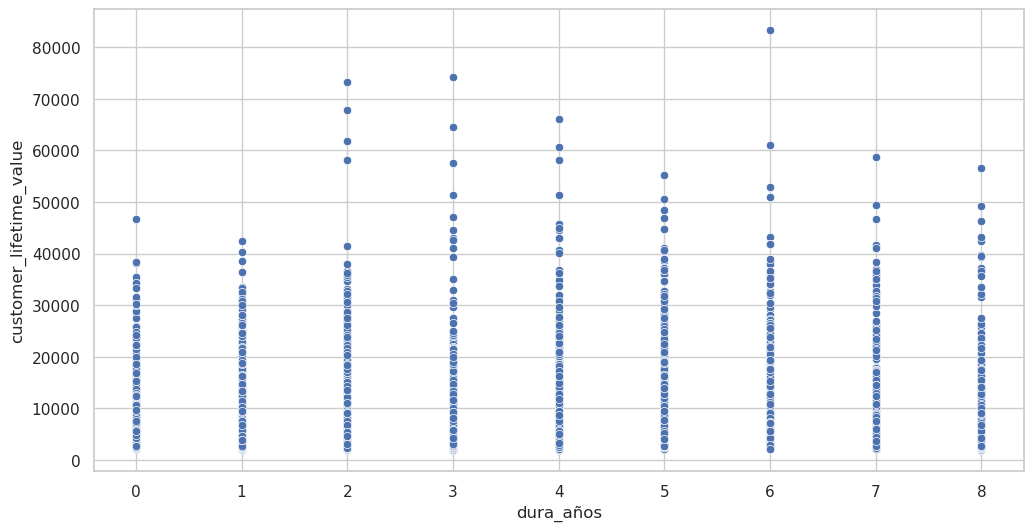

In [11]:
#Valor de vida del cliente vs edad
data['dura_años'] = round(data['months_since_policy_inception'] / 12 ,0)
sns.scatterplot(x='dura_años',y='customer_lifetime_value', data=data);

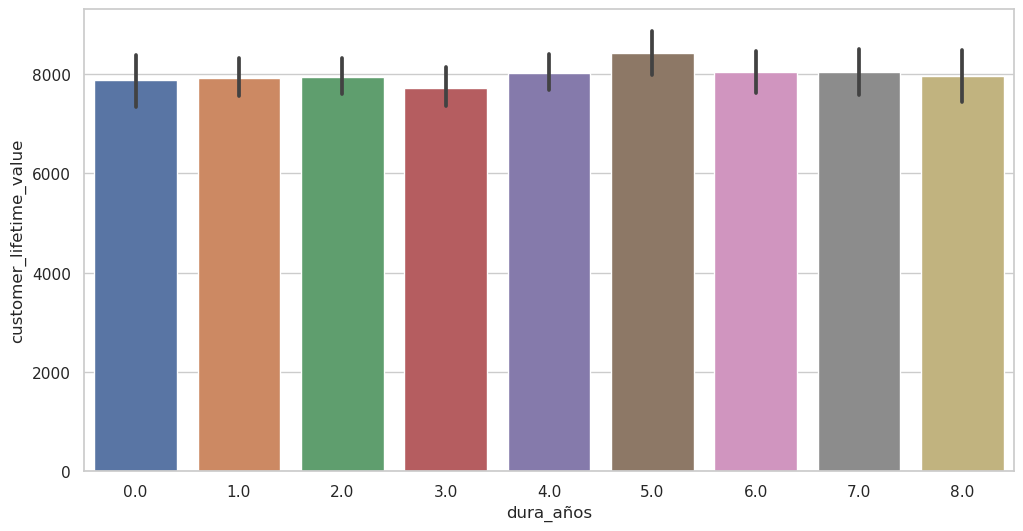

In [12]:
sns.barplot(x='dura_años',y='customer_lifetime_value', data=data);

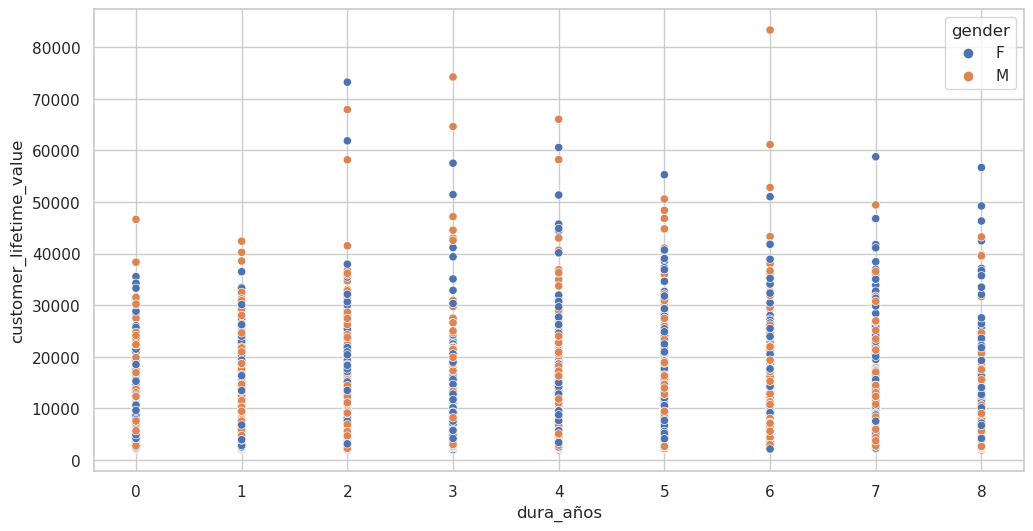

In [13]:
#Valor de vida del cliente vs edad y sexo
sns.scatterplot(x='dura_años',y='customer_lifetime_value',hue = 'gender', data=data);

<Axes: xlabel='dura_años', ylabel='customer_lifetime_value'>

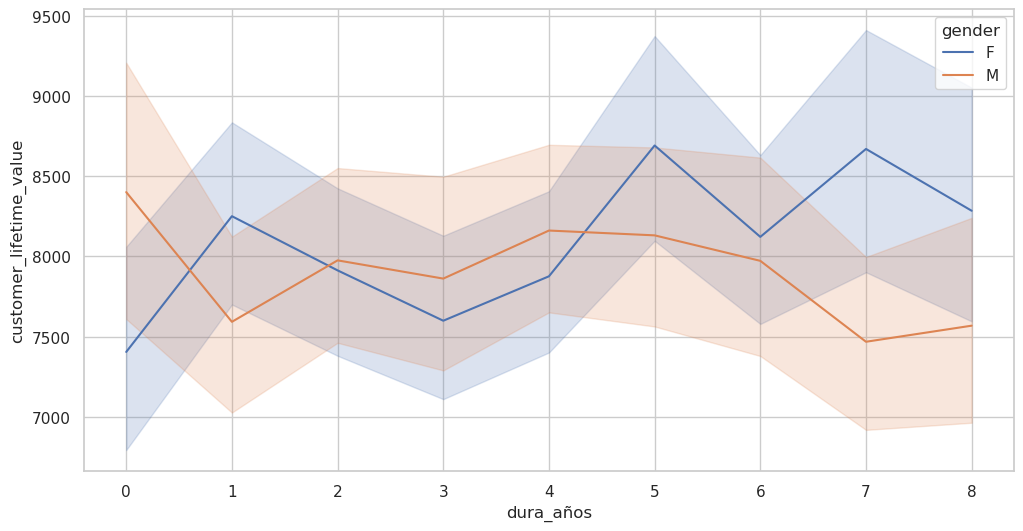

In [14]:
sns.lineplot(data=data, x="dura_años", y="customer_lifetime_value",hue='gender')

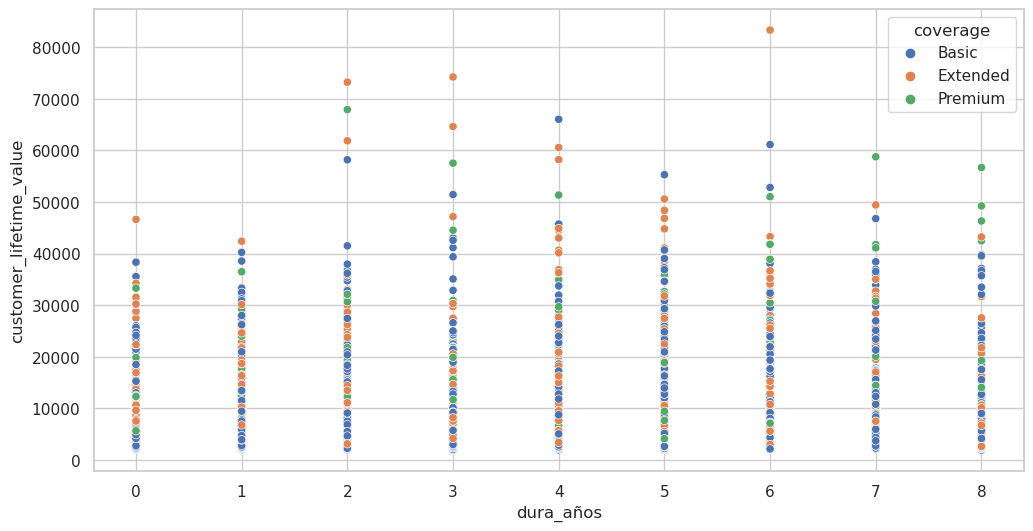

In [15]:
#Valor de vida del cliente vs edad y producto 
sns.scatterplot(x='dura_años',y='customer_lifetime_value',hue = 'coverage' ,data=data);

<Axes: xlabel='dura_años', ylabel='customer_lifetime_value'>

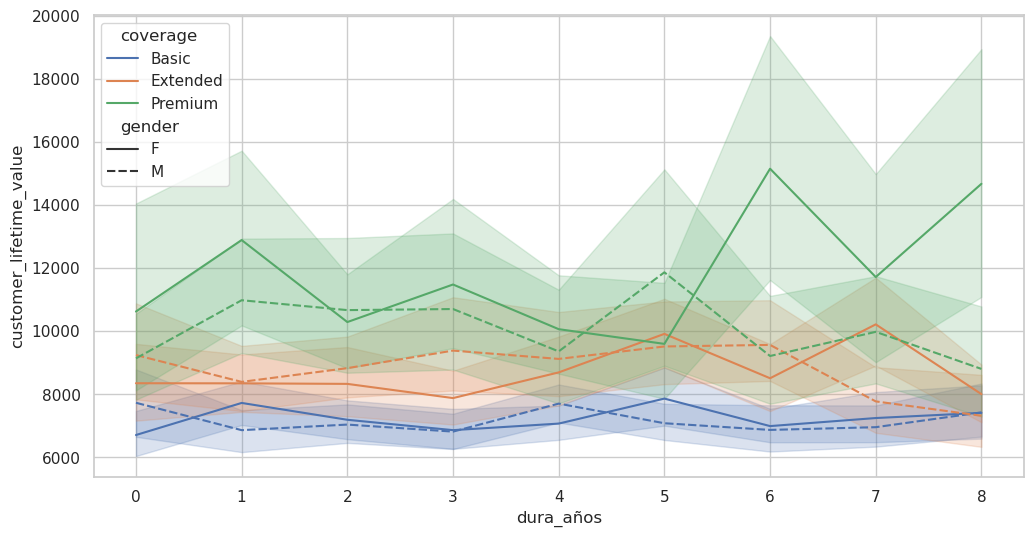

In [16]:
sns.lineplot(data=data, x="dura_años", y="customer_lifetime_value",hue='coverage',style='gender')

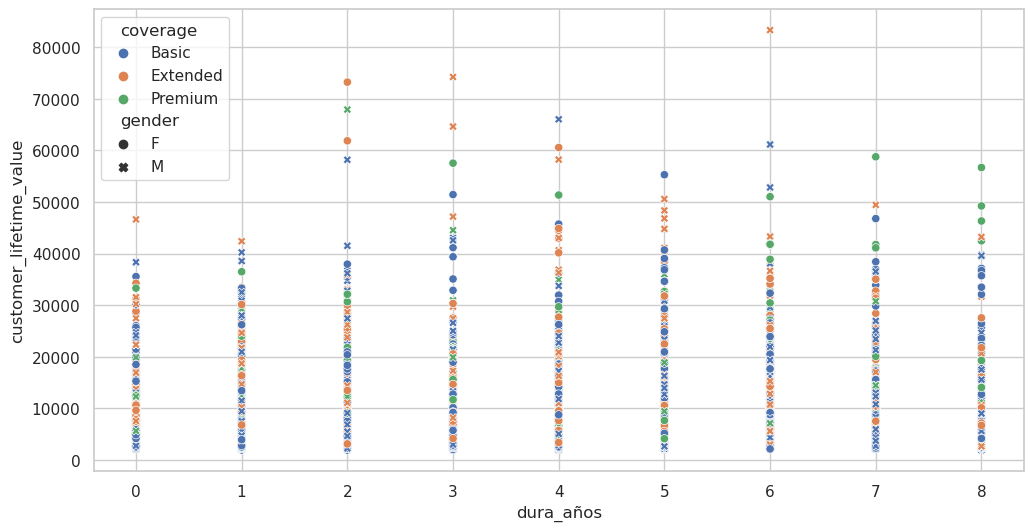

In [17]:
#Valor de vida del cliente vs edad, sexo y producto
sns.scatterplot(x='dura_años',y='customer_lifetime_value',hue = 'coverage',style='gender' ,data=data);

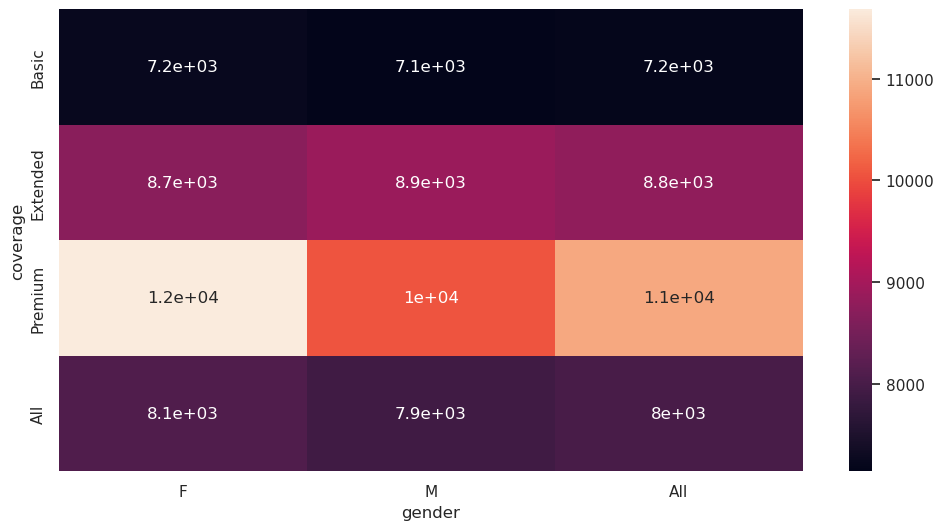

In [18]:
#relacion entre value, genero, producto
ct = pd.crosstab(data["coverage"], data["gender"], values=data["customer_lifetime_value"],
                 aggfunc="mean", margins=True)
sns.heatmap(ct, annot=True)
plt.show()

<Axes: xlabel='months_since_policy_inception', ylabel='customer_lifetime_value'>

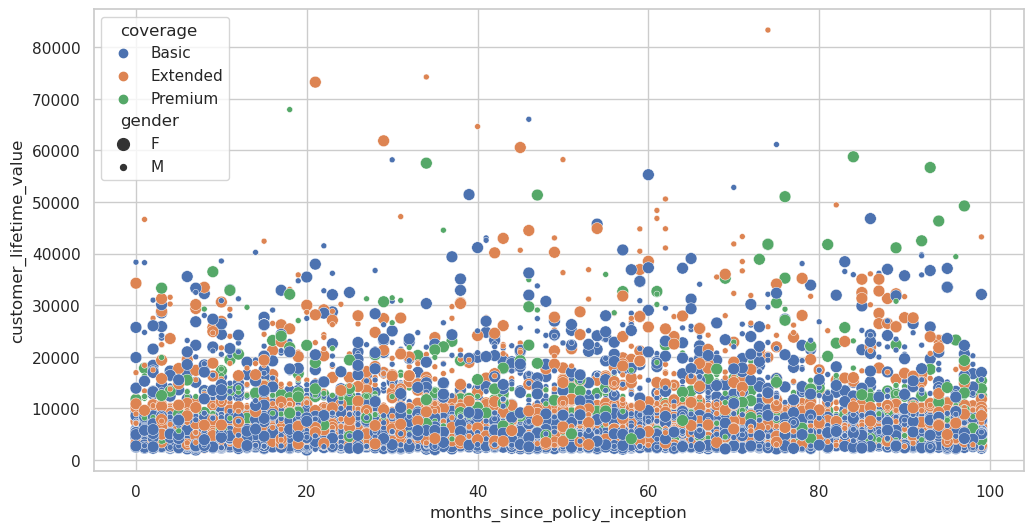

In [19]:
sns.scatterplot(x='months_since_policy_inception', y='customer_lifetime_value', hue='coverage', size='gender', data=data)

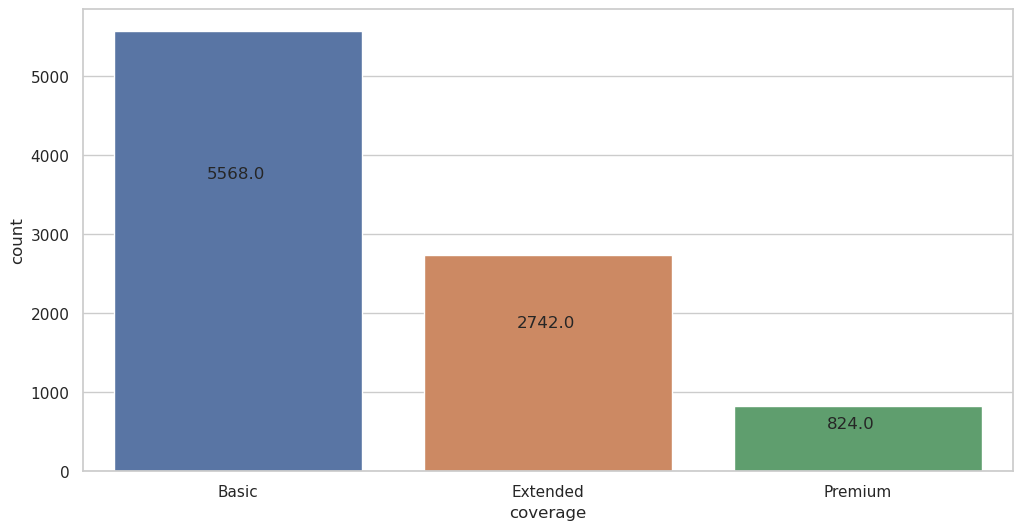

In [20]:
ax = sns.countplot(x='coverage', data=data)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()/1.5))

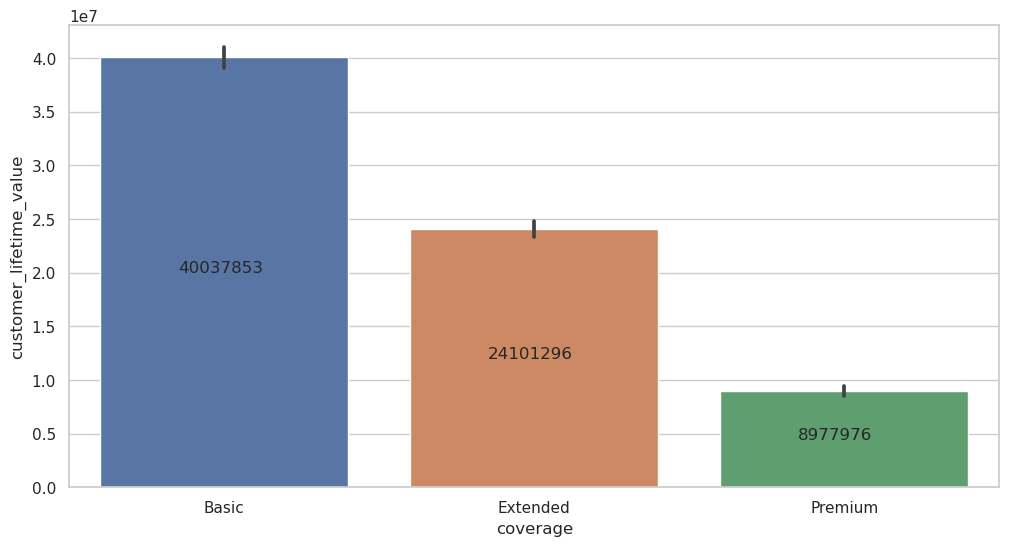

In [21]:
ax = sns.barplot(y='customer_lifetime_value',x='coverage', data=data,estimator='sum')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()/2))


- ¿Que tipo de clientes son los que más responden a las campañas de marketing? *cuando hablamos de tipo de cliente, vamos a intentar profundizar, es decir, no quedarnos en hombres y mujeres, o los que tienen un tipo de coche u otro* Intenta segmentar todo lo posible hasta que el resultado sea razonable y se pueda explicar.(Ej, clientes con polizas con menos de un año de vida, que son hombres con cohes deportivos...) Tampoco nos volvamos locos encadenando 8 segmentaciones...
- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

In [22]:
data.sample(1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,mes_adq,dura_años
9084,AL95338,California,6679.139606,No,Extended,High School or Below,2011-02-10,Unemployed,F,0,Suburban,Single,91,3,94,0,5,Personal Auto,Personal L2,Offer1,Agent,655.2,Four-Door Car,Medsize,2,8.0


In [23]:
pd.DataFrame(data.groupby(['response','employmentstatus','gender'])['customer'].count())

customer
response employmentstatus gender          
No       Disabled         F            184
                          M            149
         Employed         F           2577
                          M           2365
         Medical Leave    F            172
                          M            182
         Retired          F             38
                          M             40
         Unemployed       F           1027
                          M           1092
Yes      Disabled         F             60
                          M             12
         Employed         F            360
                          M            396
         Medical Leave    F             42
                          M             36
         Retired          F             90
                          M            114
         Unemployed       F            108
                          M             90

In [24]:
pd.DataFrame(data.groupby(['response','gender'])['customer'].count())

customer
response gender          
No       F           3998
         M           3828
Yes      F            660
         M            648

In [25]:
marke =data[(data.response == "Yes")]
marke

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,mes_adq,dura_años
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,1,8.0
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,2,1.0
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1,0.0
13,SJ95423,Arizona,8819.018934,Yes,Basic,High School or Below,2011-01-10,Employed,M,99845,Suburban,Married,110,23,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,528.000000,SUV,Medsize,1,2.0
22,YH23384,Arizona,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Personal Auto,Personal L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,RA89822,California,34611.378960,Yes,Basic,High School or Below,2011-01-14,Employed,F,20090,Suburban,Married,109,10,59,0,2,Personal Auto,Personal L2,Offer2,Agent,523.200000,Sports Car,Medsize,1,5.0
9119,YX35990,California,5479.555081,Yes,Basic,Master,2011-01-13,Employed,M,56005,Suburban,Married,68,31,30,1,3,Corporate Auto,Corporate L2,Offer1,Branch,326.400000,Four-Door Car,Small,1,2.0
9122,FH43628,California,25464.820590,Yes,Extended,College,2011-02-01,Retired,F,13663,Suburban,Single,97,1,66,0,2,Personal Auto,Personal L2,Offer1,Branch,465.600000,Four-Door Car,Small,2,6.0
9123,WZ45103,California,5678.050167,Yes,Extended,Bachelor,2011-01-19,Unemployed,F,0,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small,1,4.0


In [26]:
pd.DataFrame(data.groupby(['vehicle_class','gender','response'])['customer'].count())# ninguna mujer por coche de lujo fue catatada por la campaña de marketing

customer
vehicle_class gender response          
Four-Door Car F      No            2082
                     Yes            324
              M      No            1915
                     Yes            300
Luxury Car    F      No              63
                     Yes             12
              M      No              88
Luxury SUV    F      No              65
                     Yes             18
              M      No              89
                     Yes             12
SUV           F      No             772
                     Yes            150
              M      No             736
                     Yes            138
Sports Car    F      No             212
                     Yes             30
              M      No             182
                     Yes             60
Two-Door Car  F      No             804
                     Yes            126
              M      No             818
                     Yes            138

In [27]:
pd.DataFrame(data.groupby(['marital_status','gender','response'])['customer'].count())

customer
marital_status gender response          
Divorced       F      No             517
                      Yes            192
               M      No             528
                      Yes            132
Married        F      No            2443
                      Yes            336
               M      No            2159
                      Yes            360
Single         F      No            1038
                      Yes            132
               M      No            1141
                      Yes            156

In [28]:
# Agrupar por estado civil, género y respuesta
grouped = data.groupby(['marital_status', 'gender', 'response'])['customer'].count().reset_index()

# Crear un DataFrame con los porcentajes para cada grupo
grouped_pct = pd.pivot_table(grouped, values='customer', index=['marital_status', 'gender'], columns=['response'], fill_value=0)
grouped_pct = round(grouped_pct.divide(grouped_pct.sum(axis=1), axis=0) * 100,2)
grouped_pct

response                  No    Yes
marital_status gender              
Divorced       F       72.92  27.08
               M       80.00  20.00
Married        F       87.91  12.09
               M       85.71  14.29
Single         F       88.72  11.28
               M       87.97  12.03

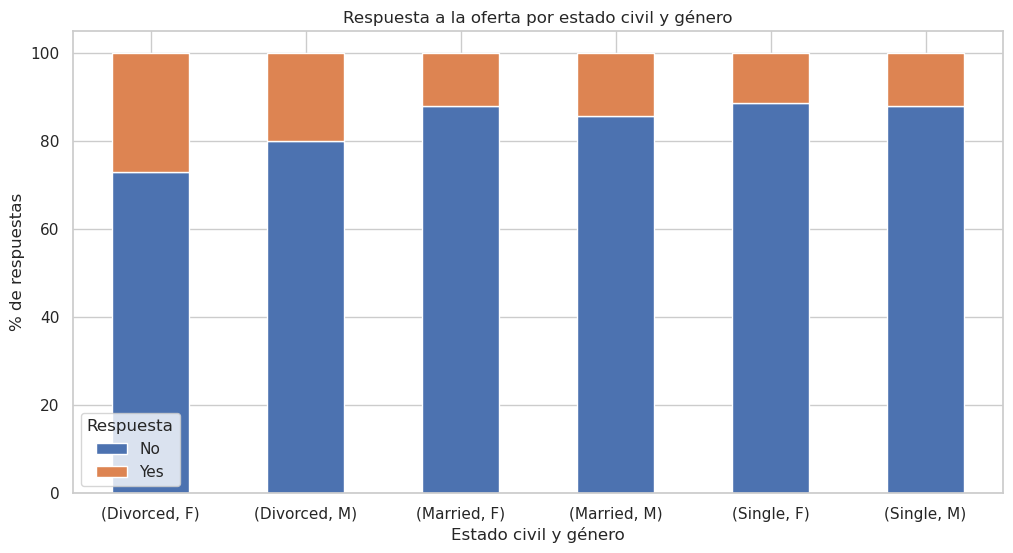

In [29]:
# Gráfico de barras apiladas por estado estado civil
grouped_pct.plot(kind='bar', stacked=True)
plt.title('Respuesta a la oferta por estado civil y género')
plt.xlabel('Estado civil y género')
plt.ylabel('% de respuestas')
plt.legend(title='Respuesta', loc='lower left')
plt.xticks(rotation=0);
plt.show()



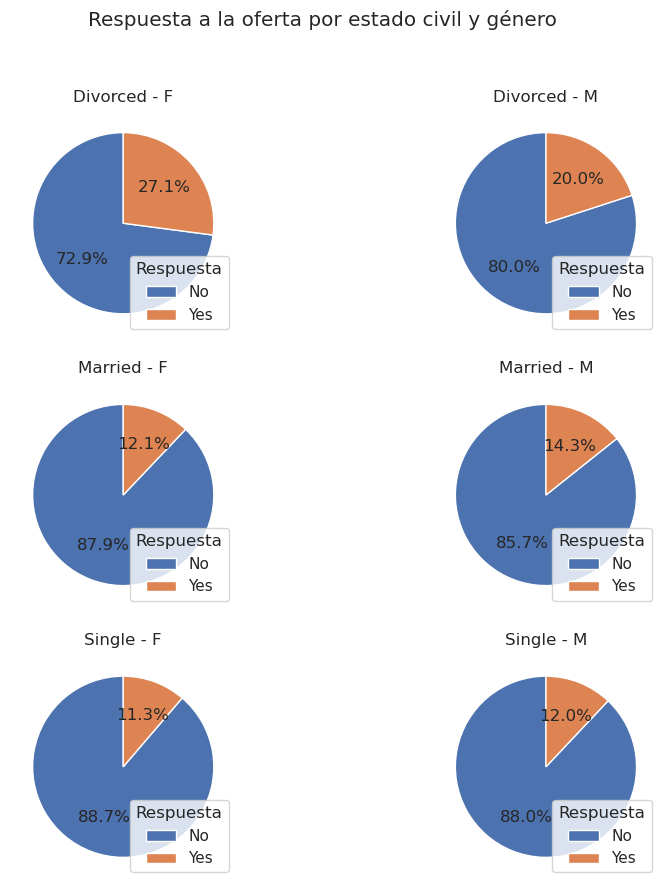

In [30]:
# Gráfico de torta
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
for i, (group, pct) in enumerate(grouped_pct.iterrows()):
    row = i // 2
    col = i % 2
    axs[row, col].pie(pct, labels=None, autopct='%1.1f%%', startangle=90)
    axs[row, col].set_title(f'{group[0]} - {group[1]}')
    axs[row, col].legend(pct.index, title='Respuesta', loc='lower right')
fig.suptitle('Respuesta a la oferta por estado civil y género')
plt.show()

In [31]:
grouped1 = data.groupby(['vehicle_class','gender','response'])['customer'].count().reset_index()

# Crear un DataFrame con los porcentajes para cada grupo
grouped_pct1 = pd.pivot_table(grouped1, values='customer', index=['vehicle_class', 'gender'], columns=['response'], fill_value=0)
grouped_pct1 = round(grouped_pct1.divide(grouped_pct1.sum(axis=1), axis=0) * 100,2)
grouped_pct1

response                  No    Yes
vehicle_class gender               
Four-Door Car F        86.53  13.47
              M        86.46  13.54
Luxury Car    F        84.00  16.00
              M       100.00   0.00
Luxury SUV    F        78.31  21.69
              M        88.12  11.88
SUV           F        83.73  16.27
              M        84.21  15.79
Sports Car    F        87.60  12.40
              M        75.21  24.79
Two-Door Car  F        86.45  13.55
              M        85.56  14.44

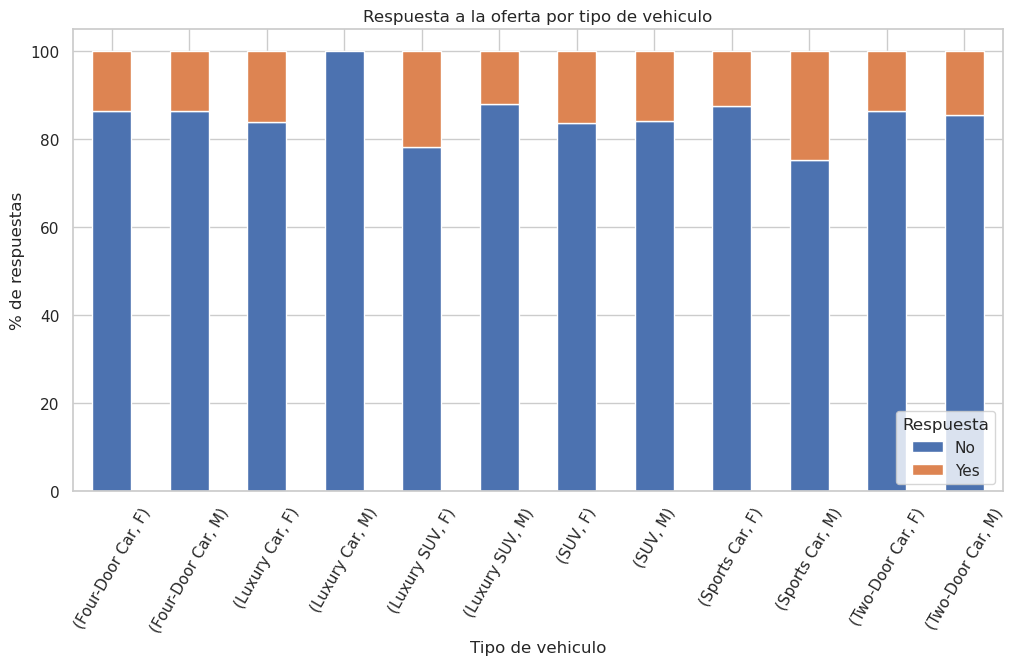

In [32]:
# Gráfico de barras apiladas por tipo de vehiculo
grouped_pct1.plot(kind='bar', stacked=True )
plt.title('Respuesta a la oferta por tipo de vehiculo')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('% de respuestas')
plt.legend(title='Respuesta', loc='lower right')
plt.xticks(rotation=60);
plt.show()

- ¿Que campaña de marketing ha sido más efectiva?
- ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?
- ¿Que campaña de marketing ha sido más efectiva por producto?
- ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

## - ¿Que campaña de marketing ha sido más efectiva?
- en base de mi explocarion lo mas efectivo a ha dido com las divorciadas con 27% de los cliente han llegados por ofertas
- y los hombres con coches sports

##  - ¿Que campaña de marketing ha sido más efectiva por canal de adquisición?

In [33]:
grouped2 = data.groupby(['sales_channel','response'])['customer'].count().reset_index()

# Crear un DataFrame con los porcentajes para cada grupo
grouped_2 = pd.pivot_table(grouped2, values='customer', index=['sales_channel'], columns=['response'], fill_value=0)
grouped_pct2 = round(grouped_2.divide(grouped_2.sum(axis=1), axis=0) * 100,2)
grouped_pct2

response,No,Yes
sales_channel,,
Agent,80.85,19.15
Branch,88.55,11.45
Call Center,89.12,10.88
Web,88.23,11.77


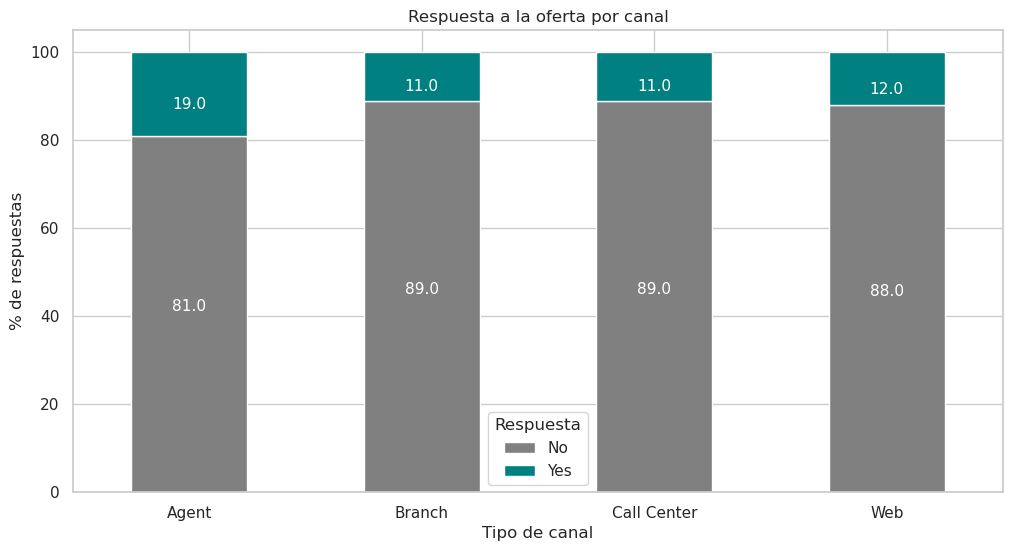

In [34]:
ax = round(grouped_pct2).plot.bar(stacked=True,color = ['grey','teal'])
for idx, p in enumerate(ax.containers):
    for q in p.patches:
        if idx == 0:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()/2),
                        ha='center', va='baseline', fontsize=11, color='white',
                        xytext=(0, 2), textcoords='offset points')
        else:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()/2),
                        ha='center', va='top', fontsize=11, color='white',
                        xytext=(0, -2), textcoords='offset points')
plt.title('Respuesta a la oferta por canal')
plt.xlabel('Tipo de canal')
plt.ylabel('% de respuestas')
plt.legend(title='Respuesta', loc='lower center')
plt.xticks(rotation=0)
plt.show() 

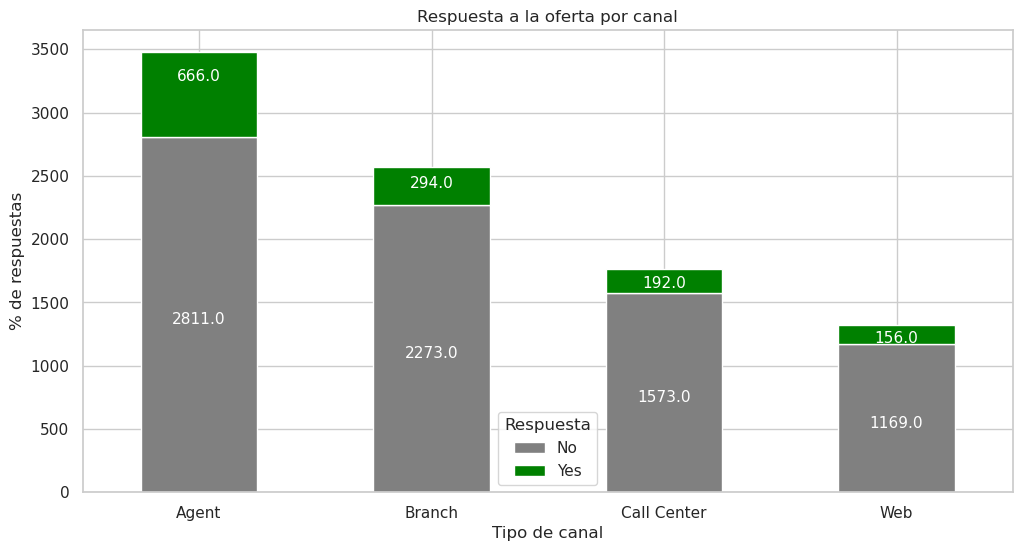

In [35]:
ax = round(grouped_2).plot.bar(stacked=True,color= ['grey','green'])
for idx, p in enumerate(ax.containers):
    for q in p.patches:
        if idx == 0:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()/2),
                        ha='center', va='top', fontsize=11, color='white',
                        xytext=(0, 2), textcoords='offset points')
        else:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()/1.2),
                        ha='center', va='top', fontsize=11, color='white',
                        xytext=(0, -2), textcoords='offset points')
plt.title('Respuesta a la oferta por canal')
plt.xlabel('Tipo de canal')
plt.ylabel('% de respuestas')
plt.legend(title='Respuesta', loc='lower center')
plt.xticks(rotation=0);
plt.show() # no se ve con claridad los numeros 

## - ¿Que campaña de marketing ha sido más efectiva por producto?

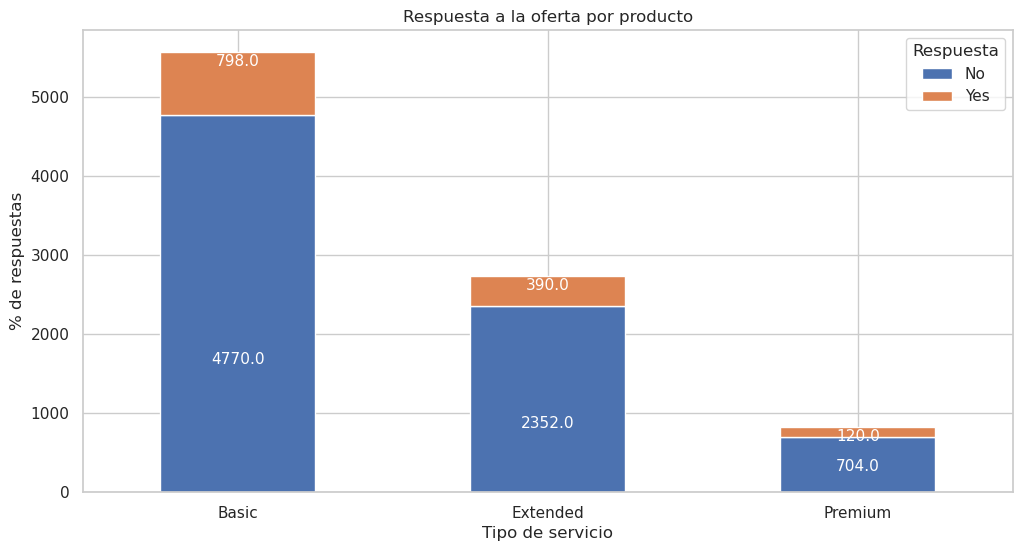

In [36]:
producto = data.groupby(['coverage','response'])['customer'].count().reset_index()

# Crear un DataFrame con los porcentaje 
producto = pd.pivot_table(producto, values='customer', index=['coverage'], columns=['response'], fill_value=0)
producto_pct = round(producto.divide(producto.sum(axis=1), axis=0) * 100,2)
ax = producto.plot.bar(stacked=True)
for idx, p in enumerate(ax.containers):
    for q in p.patches:
        if idx == 0:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()/3),
                        ha='center', va='baseline', fontsize=11, color='white',
                        xytext=(0, 2), textcoords='offset points')
        else:
            ax.annotate(str(round(q.get_height(),2)),
                        (q.get_x() + q.get_width() / 2, q.get_y() + q.get_height()),
                        ha='center', va='top', fontsize=11, color='white',
                        xytext=(0, -2), textcoords='offset pixels')
plt.title('Respuesta a la oferta por producto')
plt.xlabel('Tipo de servicio')
plt.ylabel('% de respuestas')
plt.legend(title='Respuesta', loc='upper right')
plt.xticks(rotation=0);
plt.show()# no se ve con claridad los numeros 

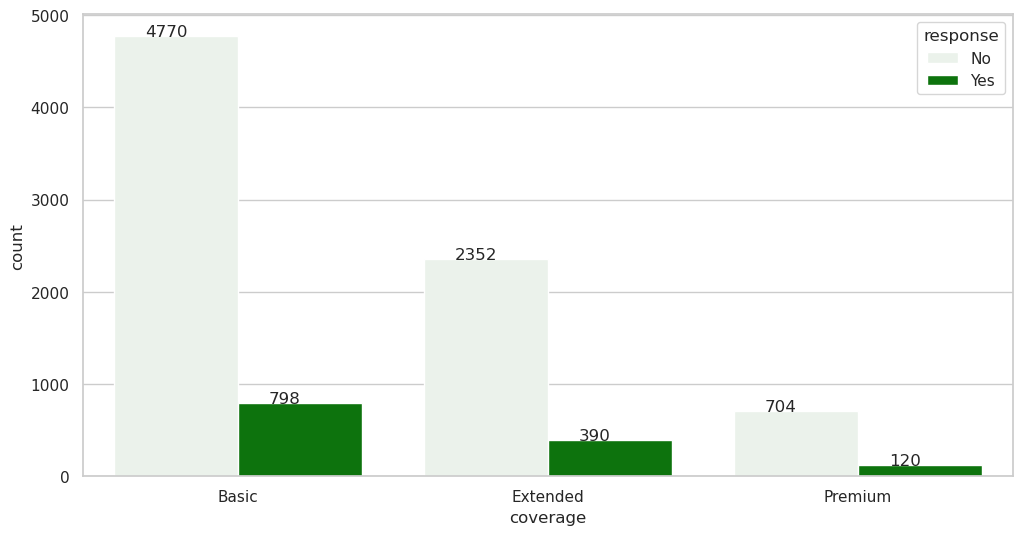

In [37]:
ax = sns.countplot(x="coverage" ,hue='response',data=data,color="green",saturation=0.8)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.1, p.get_height()))

In [38]:
producto

response,No,Yes
coverage,,
Basic,4770,798
Extended,2352,390
Premium,704,120


## - ¿Que campaña de marketing ha sido más efectiva por mes de adquisición?

In [39]:
mes_ch = data.groupby(['mes_adq','sales_channel','response'])['customer'].count().reset_index()

mes_ch = pd.pivot_table(mes_ch, values='customer', index=['mes_adq','sales_channel'], columns=['response'], fill_value=0)
mes_ch_pct = round(mes_ch.divide(mes_ch.sum(axis=1), axis=0) * 100,2)
display(mes_ch_pct , mes_ch)

response                  No    Yes
mes_adq sales_channel              
1       Agent          80.41  19.59
        Branch         86.59  13.41
        Call Center    88.49  11.51
        Web            86.12  13.88
2       Agent          81.33  18.67
        Branch         90.85   9.15
        Call Center    89.84  10.16
        Web            90.85   9.15

response                 No  Yes
mes_adq sales_channel           
1       Agent          1478  360
        Branch         1201  186
        Call Center     830  108
        Web             633  102
2       Agent          1333  306
        Branch         1072  108
        Call Center     743   84
        Web             536   54

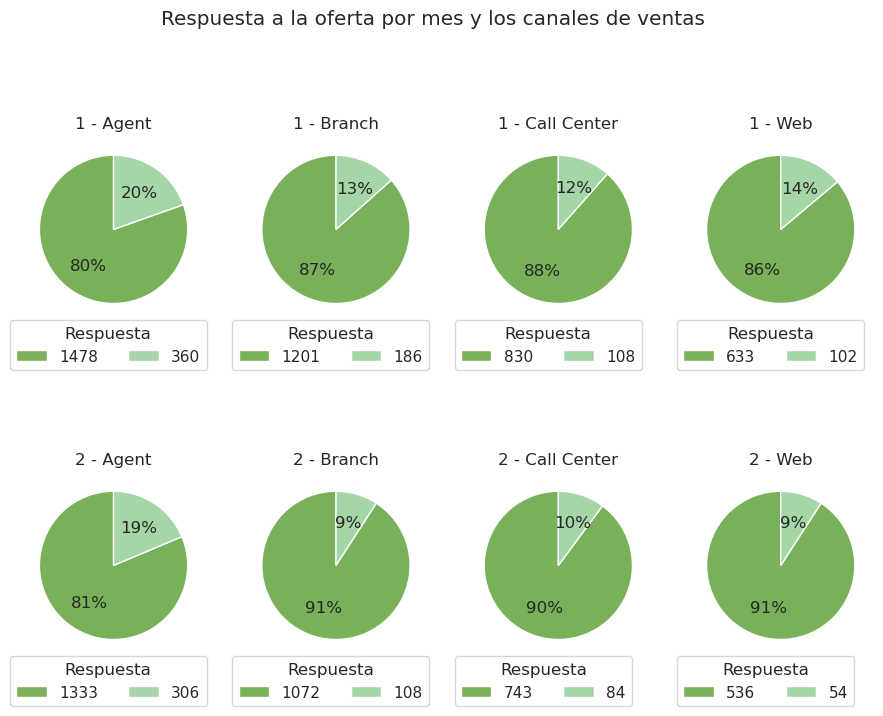

In [40]:
fig, axs = plt.subplots(2, 4, figsize=(11,8))
colors = ['#78b159', '#a5d6a7', '#c8e6c9', '#e8f5e9']  # Colores verde claro
for i, (group, pct) in enumerate(mes_ch.iterrows()):
    row = i // 4
    col = i % 4
    axs[row, col].pie(pct, labels=None, autopct='%1.0f%%', startangle=90, colors=colors)
    axs[row, col].set_title(f'{group[0]} - {group[1]}')
    axs[row, col].legend(pct.index, title='Respuesta por mes', loc='upper center', bbox_to_anchor=(0.3, -0.3), ncol=2)
    axs[row, col].legend(pct, title= 'Respuesta', loc='lower left', bbox_to_anchor=(-0.1, -0.3), ncol=2)
fig.suptitle('Respuesta a la oferta por mes y los canales de ventas')
plt.show()

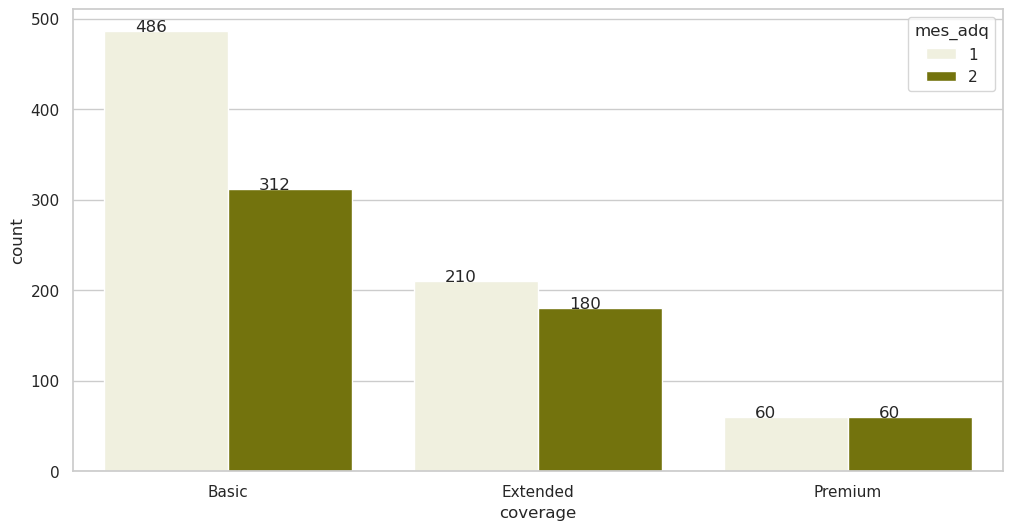

In [41]:
marke =data[(data.response == "Yes")]
ax = sns.countplot(x="coverage" ,hue='mes_adq',data=marke,color="olive",saturation=0.8)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.1, p.get_height()))